# Подключение библиотек и базы данных

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir("drive/My Drive/data_autopilot")

In [3]:
!ls

csv  img


In [8]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle

In [9]:
import keras
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [12]:
csv_file = 'v1'
csv_file_dir = os.path.join('csv', 'final')
img_front_dir_path = os.path.join('img', 'first_data')

train_file = os.path.join(csv_file_dir, csv_file + '_train.csv')
valid_file = os.path.join(csv_file_dir, csv_file + '_valid.csv')

In [6]:
df_train = pd.read_csv(train_file)

print(f'Records - {df_train.shape[0]}')

df_train.head(3)

Records - 21533


,img,steer,throttle,brake,angle_path
0,autopilot_data_2024_05_20_12_58_52_58.jpg,224,4164,0,6
1,autopilot_data_2024_05_20_12_50_20_16.jpg,-1669,9991,0,31
2,autopilot_data_2024_05_20_13_30_06_43.jpg,3,0,0,0


In [7]:
df_val = pd.read_csv(valid_file)

print(f'Records - {df_val.shape[0]}')

df_val.head(3)

Records - 3801


,img,steer,throttle,brake,angle_path
0,autopilot_data_2024_05_20_13_17_54_32.jpg,-109,5549,0,89
1,autopilot_data_2024_05_20_13_13_30_78.jpg,-48,6958,0,89
2,autopilot_data_2024_05_20_13_25_12_28.jpg,1,3792,0,90


# Рассчет mean и std

In [10]:
def img_to_arr(img):

  with image.load_img(img) as img_arr:
      img_arr = image.img_to_array(img_arr)

  return img_arr

In [11]:
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)

In [13]:
df = shuffle(df_train)
X_train_sample = np.array([img_to_arr(os.path.join(img_front_dir_path, p)) for p in df['img'][:250]])

In [15]:
for i in range(0,3):
  print(X_train_sample[:,:,:,i].mean(), X_train_sample[:,:,:,i].std())

52.51477 34.270992
52.410828 31.975933
47.140076 30.31618


In [18]:
sample_img = img_to_arr(os.path.join(img_front_dir_path, df['img'][1]))

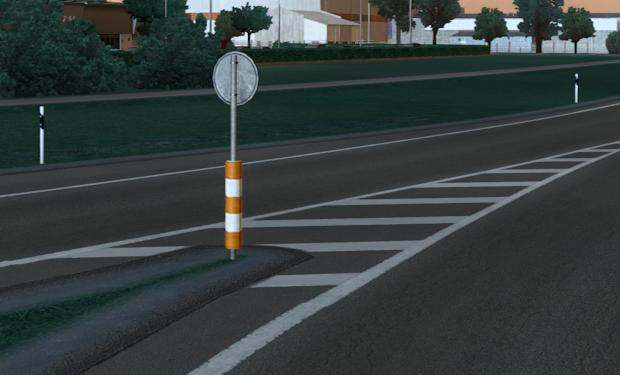

In [23]:
from google.colab.patches import cv2_imshow
cv2_imshow(sample_img)

In [24]:
sample_img.mean(), sample_img.std()

(59.291763, 35.97188)

In [1]:
sample_img[:,:,0] -= 52.5147
sample_img[:,:,0] /= 34.2709

sample_img[:,:,1] -= 52.4108
sample_img[:,:,1] /= 31.9759

sample_img[:,:,2] -= 47.1400
sample_img[:,:,2] /= 30.3161

sample_img.mean(), sample_img.std()

NameError: name 'sample_img' is not defined

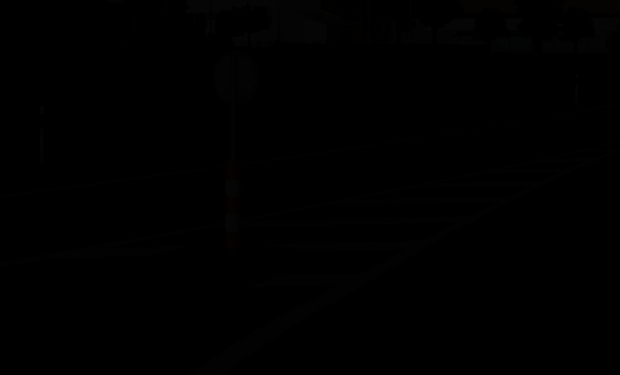

In [26]:
cv2_imshow(sample_img)